In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv("C:/Users/HARSH PATIL/Desktop/dataset/6.housing_data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.isnull().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df['AGE'].fillna(value=df['AGE'].mean(),inplace=True)
df['CRIM'].fillna(value=df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(value=df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(value=df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(value=df['CHAS'].mean(),inplace=True)
df['LSTAT'].fillna(value=df['LSTAT'].mean(),inplace=True)

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.shape

(506, 14)

C:\Users\HARSH PATIL\AppData\Local\Temp\ipykernel_10088\3191830320.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=20)


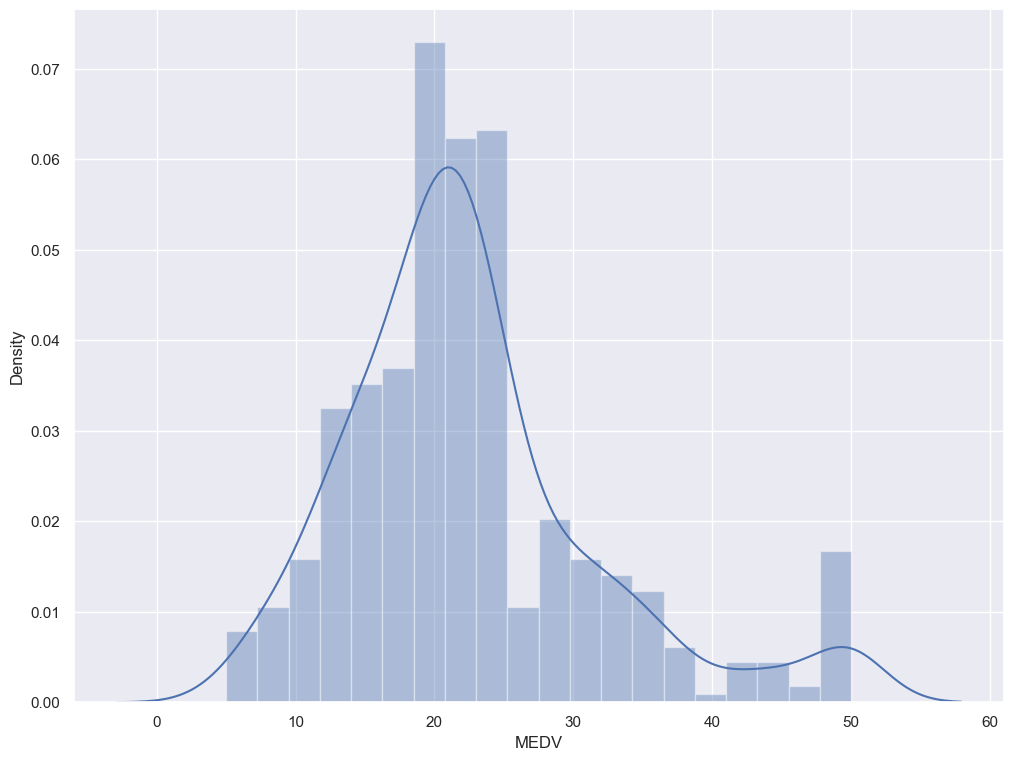

In [10]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(df['MEDV'], bins=20)
plt.show()

In [11]:
df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.18,0.39,-0.05,0.41,-0.22,0.34,-0.37,0.61,0.57,0.27,-0.37,0.43,-0.38
ZN,-0.18,1.00,-0.51,-0.04,-0.50,0.32,-0.54,0.64,-0.31,-0.31,-0.40,0.17,-0.41,0.37
INDUS,0.39,-0.51,1.00,0.06,0.74,-0.38,0.61,-0.70,0.59,0.72,0.38,-0.35,0.57,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.07,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.41,-0.50,0.74,0.07,1.00,-0.30,0.71,-0.77,0.61,0.67,0.19,-0.38,0.57,-0.43
RM,-0.22,0.32,-0.38,0.10,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.60,0.70
AGE,0.34,-0.54,0.61,0.08,0.71,-0.24,1.00,-0.72,0.45,0.50,0.26,-0.27,0.57,-0.38
DIS,-0.37,0.64,-0.70,-0.09,-0.77,0.21,-0.72,1.00,-0.49,-0.53,-0.23,0.29,-0.48,0.25
RAD,0.61,-0.31,0.59,0.00,0.61,-0.21,0.45,-0.49,1.00,0.91,0.46,-0.44,0.47,-0.38
TAX,0.57,-0.31,0.72,-0.03,0.67,-0.29,0.50,-0.53,0.91,1.00,0.46,-0.44,0.52,-0.47


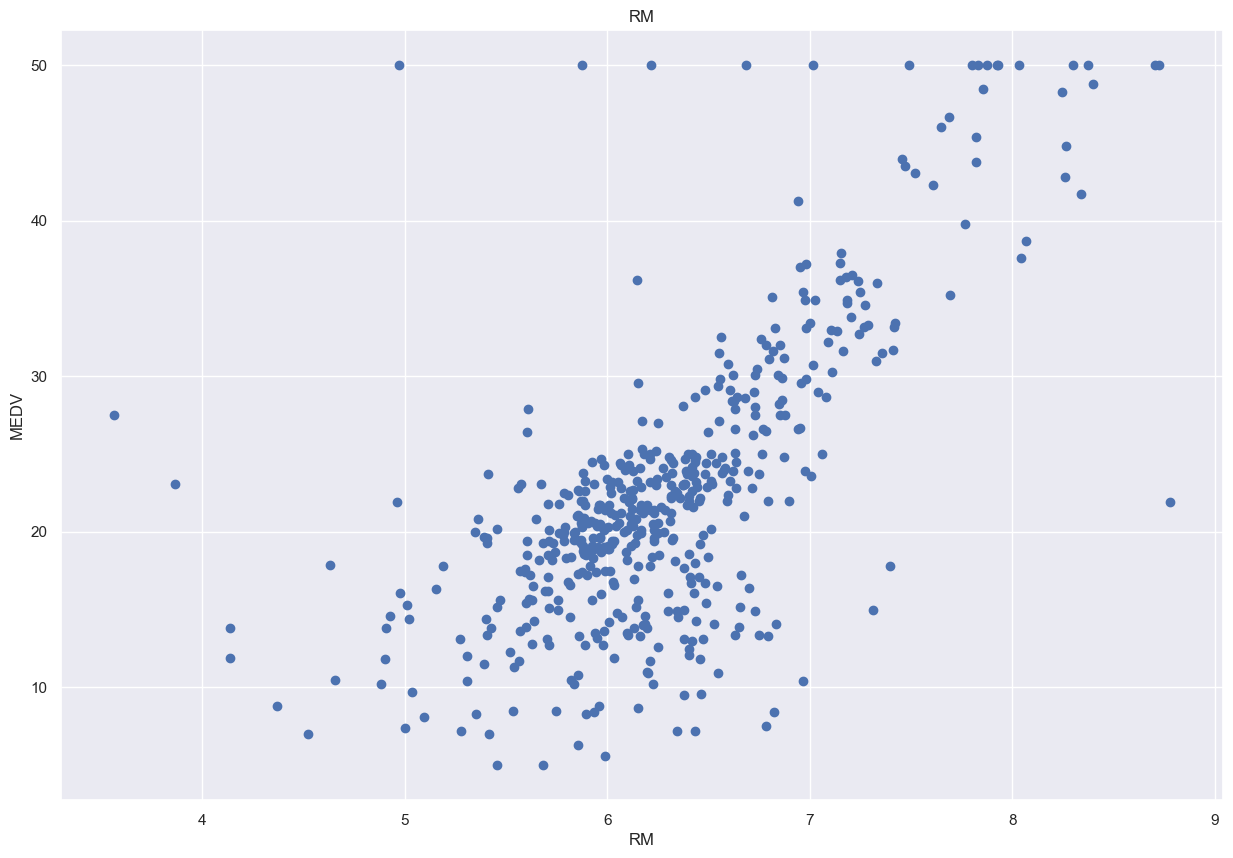

In [12]:
plt.figure(figsize=(15, 10))
plt.title("RM")
plt.xlabel("RM")
plt.ylabel('MEDV')
plt.scatter(df['RM'],df['MEDV'])

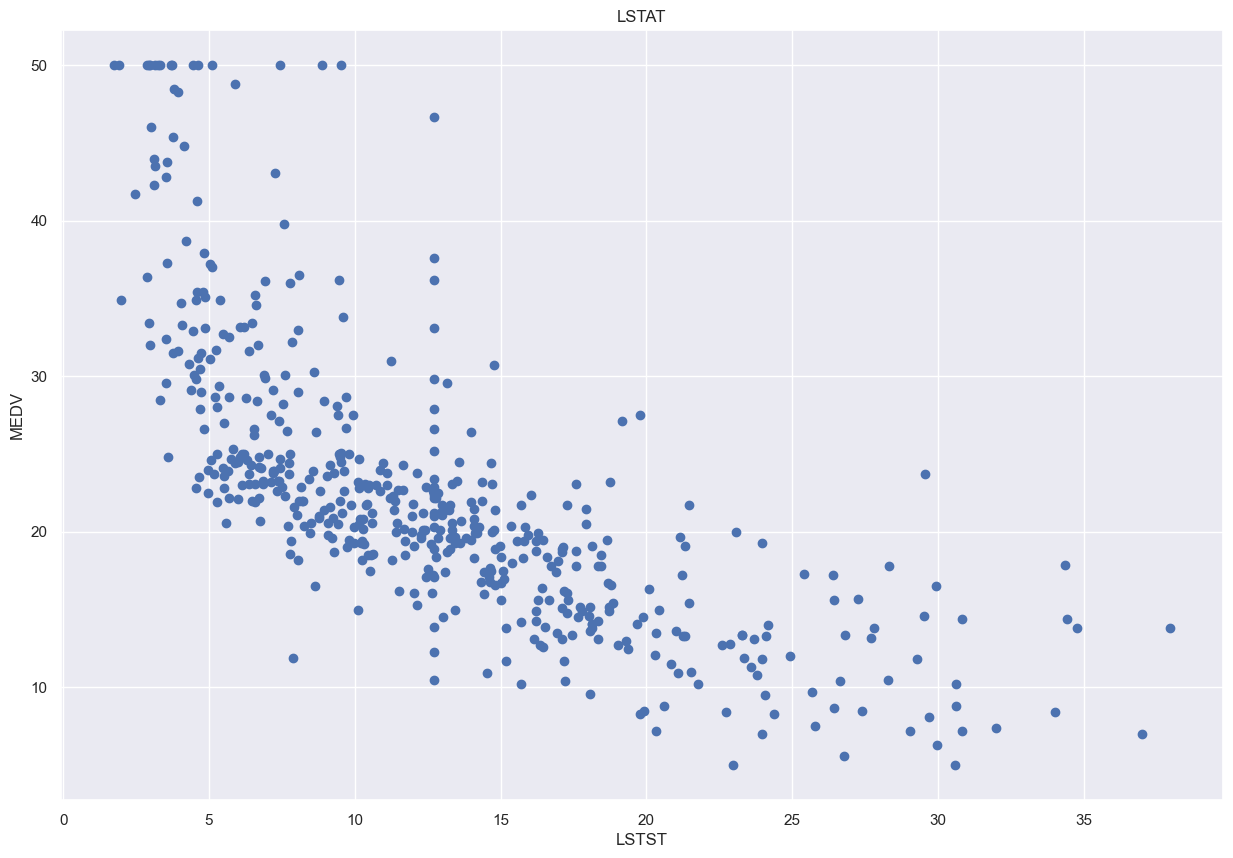

In [13]:
plt.figure(figsize=(15, 10))
plt.title("LSTAT")
plt.xlabel("LSTST")
plt.ylabel('MEDV')
plt.scatter(df['LSTAT'],df['MEDV'])

In [14]:
rm= df['RM']
medv= df['MEDV']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(rm, medv, test_size = 0.2)

In [16]:
x_train.shape

(404,)

In [17]:
y_train.shape

(404,)

In [18]:
x_test.shape

(102,)

In [19]:
y_test.shape

(102,)

In [20]:
x_train = np.array(x_train).reshape(-1, 1) 
y_train = np.array(y_train).reshape(-1, 1) 
x_test =  np.array(x_test).reshape(-1, 1) 
y_test =  np.array(y_test).reshape(-1, 1) 

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_predict = model.predict(x_test)

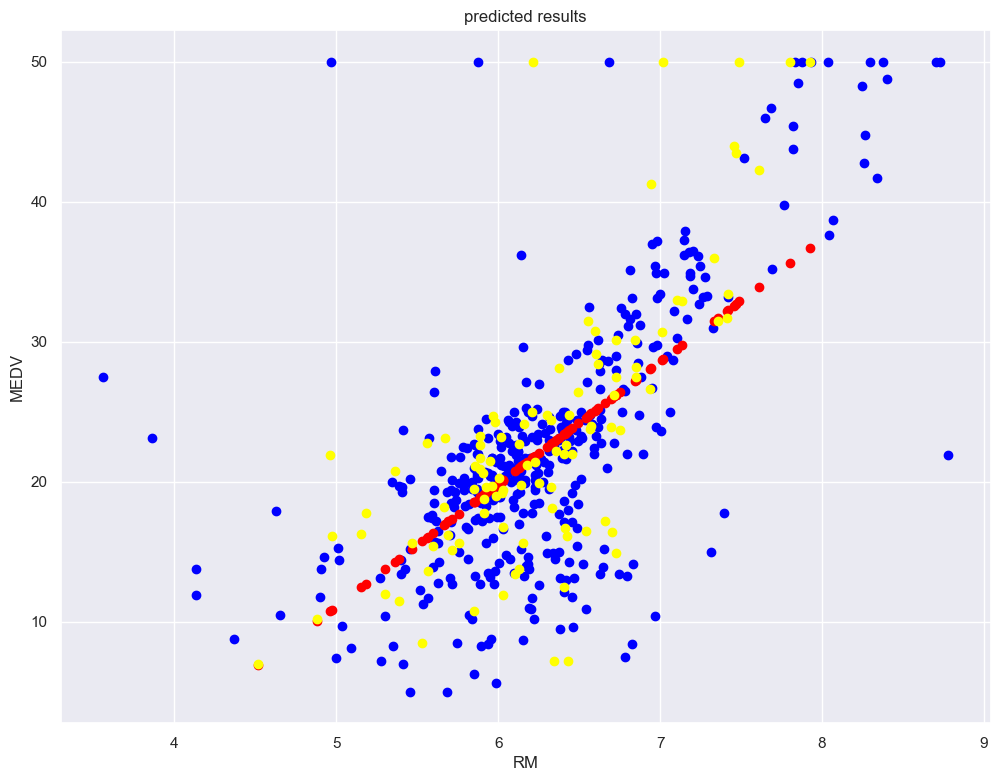

In [24]:
plt.title("predicted results")
plt.xlabel("RM")
plt.ylabel('MEDV')
plt.scatter(x_train, y_train, color='blue')

plt.scatter(x_test, y_predict, color='red',label="aa")
plt.scatter(x_test, y_test, color="yellow")

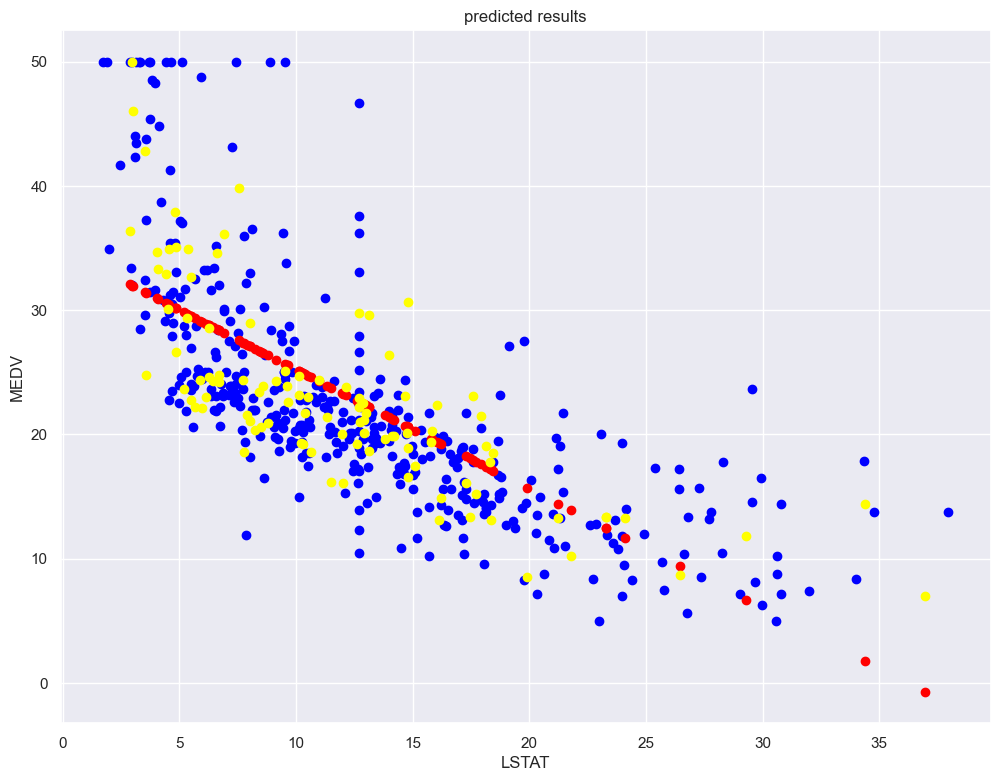

In [25]:
LSTAT= df['LSTAT']
MEDV= df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(LSTAT, MEDV, test_size = 0.2)

x_train = np.array(x_train).reshape(-1, 1) 
y_train = np.array(y_train).reshape(-1, 1) 
x_test =  np.array(x_test).reshape(-1, 1) 
y_test =  np.array(y_test).reshape(-1, 1)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
plt.title("predicted results")
plt.xlabel("LSTAT")
plt.ylabel('MEDV')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_predict, color='red')
plt.scatter(x_test, y_test, color="yellow")

In [26]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
x_train, x_test, y_train, y_test = train_test_split(X, MEDV, test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [27]:
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

print('Root Mean Squared Error is {}'.format(rmse))

Root Mean Squared Error is 5.678492965753781
